## Prepare data

In [74]:
from sklearn.preprocessing import StandardScaler
import numpy as np

features = np.array(
    [
     [-100.1,3240.1],
     [-200.2,-234.1],
     [5000.5,150.1],
     [6000.6,-125.1],
     [9000.9,-673.1]
    ]
)

target = np.array(
    [1,0,0,1,0]
)

scaler = StandardScaler()
f_std = scaler.fit_transform(features)
f_std

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [75]:
f_std.mean(), f_std.std()       # (almost) 0 mean, 1 std deviation

(1.1102230246251565e-16, 0.9999999999999999)

In [76]:
test_features = np.array(
    [
     [100.1,-3240.1],
     [200.2,234.1]
    ]
)
test_f_std = scaler.fit_transform(test_features)
test_target = np.array(
    [0,1]
)

## Define neural n/w

In [77]:
from keras import models, layers, regularizers

def make_neural():

  # simple n/w
  network = models.Sequential()
  network.add(layers.Dense(units=16, activation='relu',input_shape=(None,2)))
  network.add(layers.Dense(units=16, activation='relu'))
  network.add(layers.Dense(units=1, activation='sigmoid'))

  network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  yield network

  # optimized n/w -> wt regularization, dropout
  network = models.Sequential()
  network.add(layers.Dense(units=16, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(None,2)))
  network.add(layers.Dropout(0.5))
  network.add(layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  network.add(layers.Dropout(0.5))
  network.add(layers.Dense(units=1, activation='sigmoid'))

  network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  yield network


In [78]:
network = make_neural().__next__()

history = network.fit(f_std, target, epochs=5, verbose=1, batch_size=100, validation_data=(test_f_std, test_target))

Epoch 1/5
1/1 [==============================] - 1s 734ms/step - loss: 0.7179 - accuracy: 0.4000 - val_loss: 0.5654 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 43ms/step - loss: 0.7029 - accuracy: 0.6000 - val_loss: 0.5633 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 35ms/step - loss: 0.6926 - accuracy: 0.6000 - val_loss: 0.5612 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 37ms/step - loss: 0.6840 - accuracy: 0.6000 - val_loss: 0.5595 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 40ms/step - loss: 0.6767 - accuracy: 0.6000 - val_loss: 0.5581 - val_accuracy: 1.0000


In [79]:
network.predict(np.array([[-1.12541308,  1.96429418]]))

array([[0.6652454]], dtype=float32)

## Visualize

In [80]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [81]:
from matplotlib import pyplot as plt

def plot_training(training_, test_, legend1, legend2, xlabel_, ylabel_):
  training_thing = history.history[training_]
  test_thing = history.history[test_]

  epoch_count = range(0, len(training_thing))

  plt.plot(epoch_count, training_thing, 'r--')
  plt.plot(epoch_count, test_thing, 'b-')
  plt.legend([legend1, legend2])
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.show()

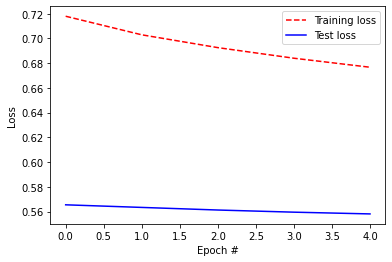

In [82]:
plot_training('loss', 'val_loss', 'Training loss', 'Test loss', 'Epoch #', 'Loss')

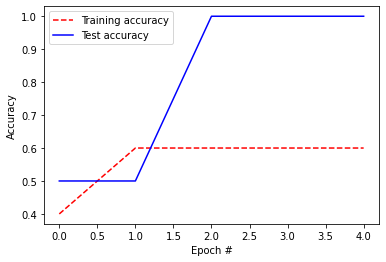

In [83]:
plot_training('accuracy', 'val_accuracy', 'Training accuracy', 'Test accuracy', 'Epoch #', 'Accuracy')

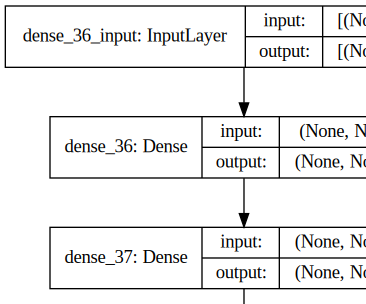

In [84]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(network, show_shapes=True, to_file='neural.png')
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))

In [85]:
network = make_neural().__next__()

history = network.fit(f_std, target, epochs=5, verbose=1, batch_size=100, validation_data=(test_f_std, test_target))

Epoch 1/5
1/1 [==============================] - 1s 727ms/step - loss: 0.8259 - accuracy: 0.2000 - val_loss: 0.8908 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 42ms/step - loss: 0.8059 - accuracy: 0.2000 - val_loss: 0.8768 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 43ms/step - loss: 0.7924 - accuracy: 0.2000 - val_loss: 0.8677 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 37ms/step - loss: 0.7820 - accuracy: 0.2000 - val_loss: 0.8573 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 39ms/step - loss: 0.7734 - accuracy: 0.2000 - val_loss: 0.8499 - val_accuracy: 0.0000e+00


In [86]:
network.predict(np.array([[-1.12541308,  1.96429418]]))

array([[0.46188548]], dtype=float32)

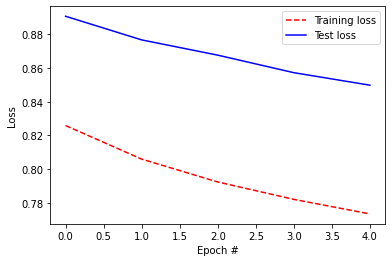

In [87]:
plot_training('loss', 'val_loss', 'Training loss', 'Test loss', 'Epoch #', 'Loss')

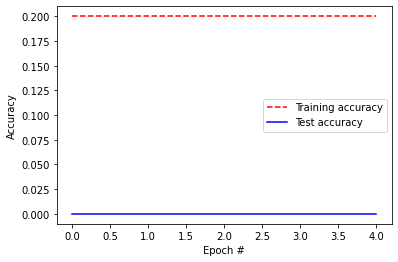

In [88]:
plot_training('accuracy', 'val_accuracy', 'Training accuracy', 'Test accuracy', 'Epoch #', 'Accuracy')

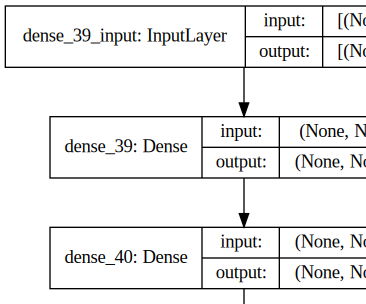

In [89]:
plot_model(network, show_shapes=True, to_file='neural_optimized.png')
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))

$BY Gaurav Kabra$